In [1]:
# importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the dataset
churn = pd.read_csv(r"C:\Users\Vikas\OneDrive\Desktop\DataSets\WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
# Reading the dataset
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Looking datatypes
churn.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
# Looking for missing data
churn.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


##### As we can see in this dataset,we have a  column name with 'TotalCharges' is numerical datatype but when we see his datatype it is retu an object. so lets convert it to the numerical datatype.

In [7]:
# converting 'TotalCharges' to the numeric datatype

churn['TotalCharges'] = pd.to_numeric(churn['TotalCharges'], errors='coerce')

In [8]:
churn.TotalCharges.dtypes


dtype('float64')

In [9]:
# now looking for missing value
churn.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [10]:
# we can see in TotalCharges column we have 11 missing data. lets fill the data with his mean value

churn['TotalCharges'] = churn['TotalCharges'].fillna(churn['TotalCharges'].mean())

In [11]:
churn.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
# Finding the 5 point summary

churn.describe().T


,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.000,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.000,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.500,70.35,89.85,118.75
TotalCharges,7043.0,2283.300441,2265.000258,18.80,402.225,1400.55,3786.60,8684.80


In [13]:
churn.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [14]:
for cols in churn.columns:
    print(cols)
    print(churn[cols].unique())

customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender
['Female' 'Male']
SeniorCitizen
[0 1]
Partner
['Yes' 'No']
Dependents
['No' 'Yes']
tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService
['No' 'Yes']
MultipleLines
['No phone service' 'No' 'Yes']
InternetService
['DSL' 'Fiber optic' 'No']
OnlineSecurity
['No' 'Yes' 'No internet service']
OnlineBackup
['Yes' 'No' 'No internet service']
DeviceProtection
['No' 'Yes' 'No internet service']
TechSupport
['No' 'Yes' 'No internet service']
StreamingTV
['No' 'Yes' 'No internet service']
StreamingMovies
['No' 'Yes' 'No internet service']
Contract
['Month-to-month' 'One year' 'Two year']
PaperlessBilling
['Yes' 'No']
PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (a

In [15]:
# here customerId does not make any sense.So drop the column

churn = churn.drop(['customerID'], axis = 1)

In [16]:
churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [17]:
# Converting 'Yes' & 'No' to 1 & 0
con_cols = ['Partner','Dependents','PhoneService','PaperlessBilling','Churn']
for item in con_cols:
    churn[item].replace({'Yes':1,'No':0}, inplace = True)

In [18]:
churn.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0


In [19]:
# lets visualize and analyize them

IS = churn['InternetService'].value_counts()
OS = churn['OnlineSecurity'].value_counts()
OB = churn['OnlineBackup'].value_counts()
DP = churn['DeviceProtection'].value_counts()
TS = churn['TechSupport'].value_counts()
ST = churn['StreamingTV'].value_counts()
SM = churn['StreamingMovies'].value_counts()
CT = churn['Contract'].value_counts()
PM = churn['PaymentMethod'].value_counts()
ML = churn['MultipleLines'].value_counts()
ML

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

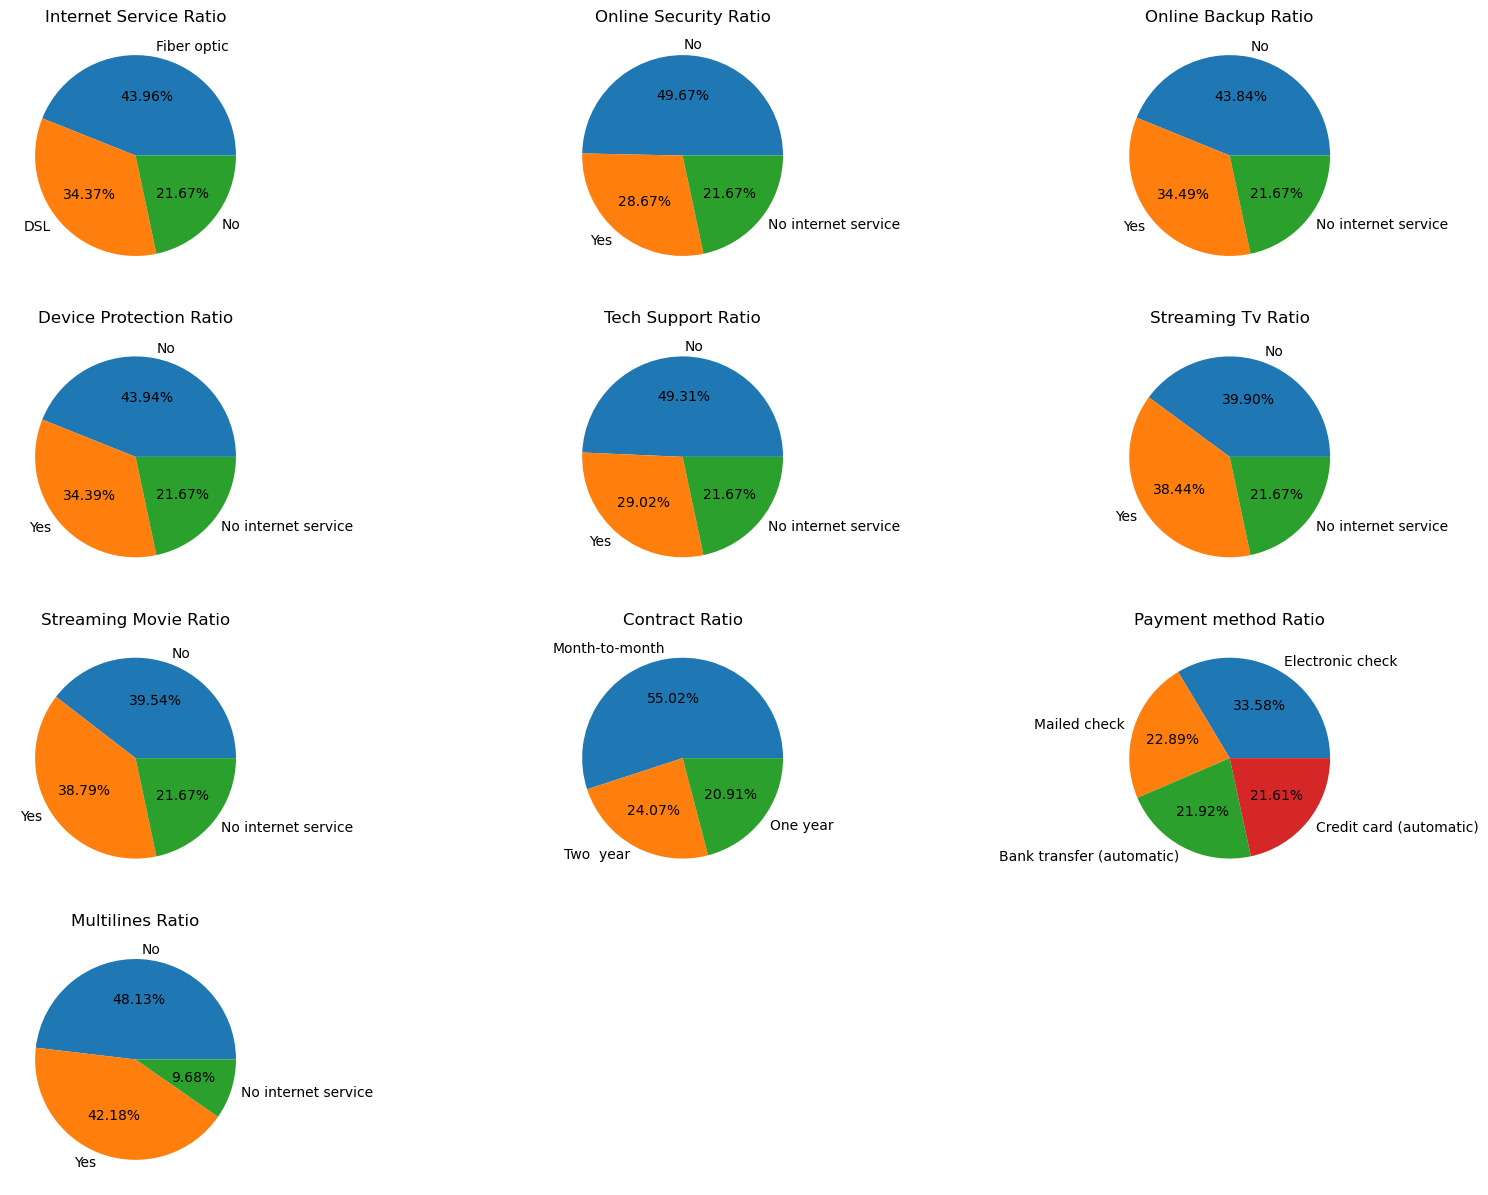

In [20]:
plt.figure(figsize=(20,15))
plt.subplot(4,3,1)
plt.pie(IS, data = churn, autopct='%.2f%%',labels=['Fiber optic','DSL','No'])         
plt.title('Internet Service Ratio')

plt.subplot(4,3,2)
plt.pie(OS, data = churn, autopct='%.2f%%',labels=['No','Yes','No internet service'])
plt.title('Online Security Ratio')

plt.subplot(4,3,3)
plt.pie(OB, data = churn, autopct='%.2f%%',labels=['No','Yes','No internet service'])
plt.title('Online Backup Ratio')

plt.subplot(4,3,4)
plt.pie(DP, data = churn, autopct='%.2f%%',labels=['No','Yes','No internet service'])
plt.title('Device Protection Ratio')

plt.subplot(4,3,5)
plt.pie(TS, data = churn, autopct='%.2f%%',labels=['No','Yes','No internet service'])
plt.title('Tech Support Ratio')

plt.subplot(4,3,6)
plt.pie(ST, data = churn, autopct='%.2f%%',labels=['No','Yes','No internet service'])
plt.title('Streaming Tv Ratio')

plt.subplot(4,3,7)
plt.pie(SM, data = churn, autopct='%.2f%%',labels=['No','Yes','No internet service'])
plt.title('Streaming Movie Ratio')

plt.subplot(4,3,8)
plt.pie(CT, data = churn, autopct='%.2f%%',labels=['Month-to-month','Two  year','One year'])
plt.title('Contract Ratio')

plt.subplot(4,3,9)
plt.pie(PM, data = churn, autopct='%.2f%%',labels=['Electronic check','Mailed check','Bank transfer (automatic)','Credit card (automatic)'])
plt.title('Payment method Ratio')

plt.subplot(4,3,10)
plt.pie(ML, data = churn, autopct='%.2f%%',labels=['No','Yes','No internet service'])
plt.title('Multilines Ratio')
plt.show()



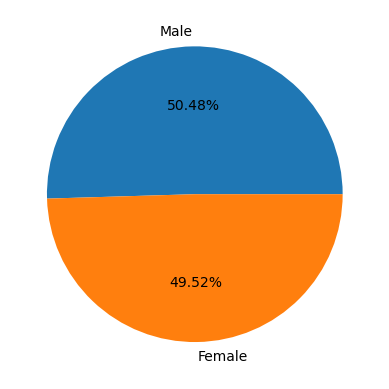

In [21]:
# Checking for Male & Female Ratio
MF = churn['gender'].value_counts()
plt.pie(MF, data= churn, autopct='%.2f%%', labels = ['Male','Female'])
plt.show()

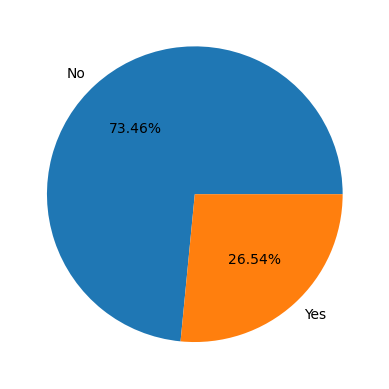

In [22]:
# Checking for the balance and Imbalance data

BI = churn['Churn'].value_counts()
plt.pie(BI, data = churn, autopct='%.2f%%', labels = ['No','Yes'])  # here 0:'No', 1:'Yes'
plt.show()

##### as we can see in the above graph, our dataset have imbalanced data.

In [23]:
# Lets do encoding to convert categorical data to numeric data.
from sklearn.preprocessing import OneHotEncoder

In [24]:
onehot = OneHotEncoder()

In [25]:
# selecting categorical columns and put it in a list.
cat_cols = ['gender','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaymentMethod']

In [26]:
Encoded_data = onehot.fit_transform(churn[cat_cols])

In [27]:
Encoded_data

<7043x33 sparse matrix of type '<class 'numpy.float64'>'
	with 77473 stored elements in Compressed Sparse Row format>

In [28]:
Encoded_df = pd.DataFrame(Encoded_data.toarray(), columns = onehot.get_feature_names(cat_cols))

In [29]:
Encoded_df.head()

,gender_Female,gender_Male,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [30]:
# concatenating Encoded Dataframe with main Dataframe(churn).

churn_encoded_df = pd.concat([Encoded_df,churn], axis = 1)
churn_encoded_df.head()

,gender_Female,gender_Male,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,Female,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,Male,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,Male,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,Male,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,Female,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [31]:
churn_encoded_df = churn_encoded_df.drop(['gender','MultipleLines','InternetService','OnlineSecurity',
                                          'OnlineBackup','DeviceProtection','TechSupport','StreamingTV',
                                          'StreamingMovies','Contract','PaymentMethod','gender_Female','MultipleLines_Yes',
                                         'InternetService_No','OnlineSecurity_Yes','OnlineBackup_Yes','DeviceProtection_Yes',
                                         'StreamingTV_Yes','StreamingMovies_Yes','Contract_Two year','PaymentMethod_Mailed check'],
                                        axis = 1)

In [32]:
churn_encoded_df.head()

,gender_Male,MultipleLines_No,MultipleLines_No phone service,InternetService_DSL,InternetService_Fiber optic,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineBackup_No,OnlineBackup_No internet service,DeviceProtection_No,DeviceProtection_No internet service,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingMovies_No,StreamingMovies_No internet service,Contract_Month-to-month,Contract_One year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0,1,0,1,0,1,29.85,29.85,0
1,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0,34,1,0,56.95,1889.50,0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0,2,1,1,53.85,108.15,1
3,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0,0,0,45,0,0,42.30,1840.75,0
4,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0,0,2,1,1,70.70,151.65,1


In [33]:
# as we know that our dataset is imbalanced, let check more time.
churn_encoded_df['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

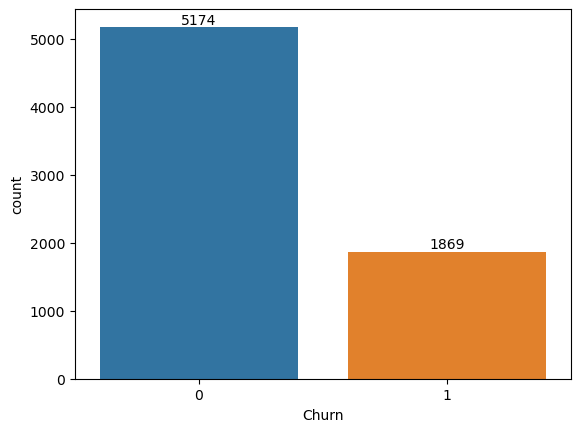

In [34]:
ax = sns.countplot(churn_encoded_df['Churn'])
for i in ax.containers:
    ax.bar_label(i)

In [35]:
# lets balance the the data

from imblearn.over_sampling import SMOTE

In [36]:
smote = SMOTE()

In [37]:
x = churn_encoded_df.drop(['Churn'], axis = 1)

In [38]:
x.head(1)

,gender_Male,MultipleLines_No,MultipleLines_No phone service,InternetService_DSL,InternetService_Fiber optic,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineBackup_No,OnlineBackup_No internet service,DeviceProtection_No,DeviceProtection_No internet service,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingMovies_No,StreamingMovies_No internet service,Contract_Month-to-month,Contract_One year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges
0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0,1,0,1,0,1,29.85,29.85


In [39]:
y = churn_encoded_df['Churn']

In [40]:
y.head(1)

0    0
Name: Churn, dtype: int64

In [41]:
x_final, y_final = smote.fit_resample(x,y)

In [42]:
len(x_final)
print(type(x_final))

<class 'pandas.core.frame.DataFrame'>


In [43]:
len(y_final)

10348

In [44]:
type(y_final)

pandas.core.series.Series

In [45]:
# converting Series to a dataframe
#c_df = pd.DataFrame(y_final)

<AxesSubplot:xlabel='Churn', ylabel='count'>

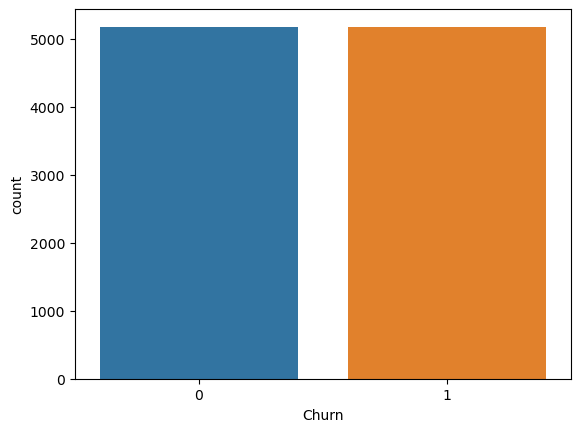

In [46]:
sns.countplot(y_final)

### now our data is balanced.


In [47]:
churn_encoded_df = pd.concat([x_final,y_final], axis = 1)

In [48]:
churn_encoded_df.head(2)

,gender_Male,MultipleLines_No,MultipleLines_No phone service,InternetService_DSL,InternetService_Fiber optic,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineBackup_No,OnlineBackup_No internet service,DeviceProtection_No,DeviceProtection_No internet service,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingMovies_No,StreamingMovies_No internet service,Contract_Month-to-month,Contract_One year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0,1,0,1,0,1,29.85,29.85,0
1,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0,34,1,0,56.95,1889.50,0


<AxesSubplot:xlabel='Churn', ylabel='count'>

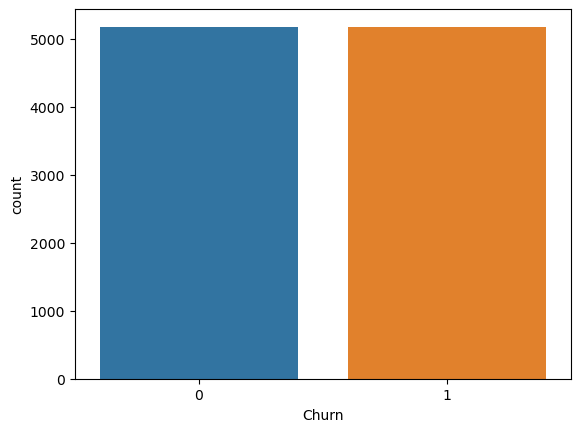

In [49]:
sns.countplot(churn_encoded_df['Churn'])

In [50]:
# Selecting Independent and Dependent variable 
x = churn_encoded_df.iloc[:,:-1] # independent variable
y = churn_encoded_df.iloc[:,-1]  # dependent variable

In [51]:
x.head()

,gender_Male,MultipleLines_No,MultipleLines_No phone service,InternetService_DSL,InternetService_Fiber optic,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineBackup_No,OnlineBackup_No internet service,DeviceProtection_No,DeviceProtection_No internet service,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingMovies_No,StreamingMovies_No internet service,Contract_Month-to-month,Contract_One year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges
0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0,1,0,1,0,1,29.85,29.85
1,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0,34,1,0,56.95,1889.50
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0,2,1,1,53.85,108.15
3,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0,0,0,45,0,0,42.30,1840.75
4,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0,0,2,1,1,70.70,151.65


In [52]:
# Spliting the data
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=2)

In [54]:
X_train.shape

(8278, 31)

In [55]:
y_train.shape

(8278,)

In [56]:
# now, its time to building our model
from sklearn.linear_model import LogisticRegression

In [57]:
lr = LogisticRegression()

In [58]:
lr.fit(X_train, y_train)

LogisticRegression()

In [59]:
# checking our model accuracy score

from sklearn.metrics import accuracy_score

In [60]:
pred = lr.predict(X_train)

In [61]:
acc = accuracy_score(pred,y_train)

In [62]:
acc

0.7805025368446484

In [63]:

predd = lr.predict(X_test)

In [64]:
acc1 = accuracy_score(predd,y_test)

In [65]:
acc1

0.7816425120772947